# MNIST Handwritten Digit Recognition

## Problem Statement

A classic problem in the field of pattern recognition is that of handwritten digit recognition. Suppose that you have images of handwritten digits ranging from 0-9 written by various people in boxes of a specific size - similar to the application forms in banks and universities.

We are divided analysis in following steps:-<br>
    1-Data understanding and cleaning<br>
    2-Data preparation for model building<br>
    3-Building an SVM model
    


In [38]:
import warnings
warnings.filterwarnings('ignore')

In [39]:
# libraries
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.metrics import classification_report
import os

## Data Understanding and Data Cleaning 

In [40]:
#import data set

df_digits= pd.read_csv("C:/Users/nidhi/Desktop/train_svm.csv")
df_digits.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# summary of the dataset:
print(df_digits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None


In [42]:
# Inspect the  of the dataset
print(df_digits.shape)
print(df_digits.columns)
print(df_digits.info())
print(df_digits.describe())

(42000, 785)
Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB
None
              label   pixel0   pixel1   pixel2   pixel3   pixel4   pixel5  \
count  42000.000000  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0   
mean       4.456643      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.887730      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0     

In [43]:
print(df_digits.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [44]:
#checking null values

print(df_digits.isnull().values.any())
print(df_digits.isnull().values.sum())
print(df_digits.isnull().sum()*100/df_digits.shape[0])

False
0
label       0.0
pixel0      0.0
pixel1      0.0
pixel2      0.0
pixel3      0.0
pixel4      0.0
pixel5      0.0
pixel6      0.0
pixel7      0.0
pixel8      0.0
pixel9      0.0
pixel10     0.0
pixel11     0.0
pixel12     0.0
pixel13     0.0
pixel14     0.0
pixel15     0.0
pixel16     0.0
pixel17     0.0
pixel18     0.0
pixel19     0.0
pixel20     0.0
pixel21     0.0
pixel22     0.0
pixel23     0.0
pixel24     0.0
pixel25     0.0
pixel26     0.0
pixel27     0.0
pixel28     0.0
           ... 
pixel754    0.0
pixel755    0.0
pixel756    0.0
pixel757    0.0
pixel758    0.0
pixel759    0.0
pixel760    0.0
pixel761    0.0
pixel762    0.0
pixel763    0.0
pixel764    0.0
pixel765    0.0
pixel766    0.0
pixel767    0.0
pixel768    0.0
pixel769    0.0
pixel770    0.0
pixel771    0.0
pixel772    0.0
pixel773    0.0
pixel774    0.0
pixel775    0.0
pixel776    0.0
pixel777    0.0
pixel778    0.0
pixel779    0.0
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
Length: 785, dty

#### No Null Values 

In [45]:
digits_mean = df_digits.groupby('label').mean()
digits_mean.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
label,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


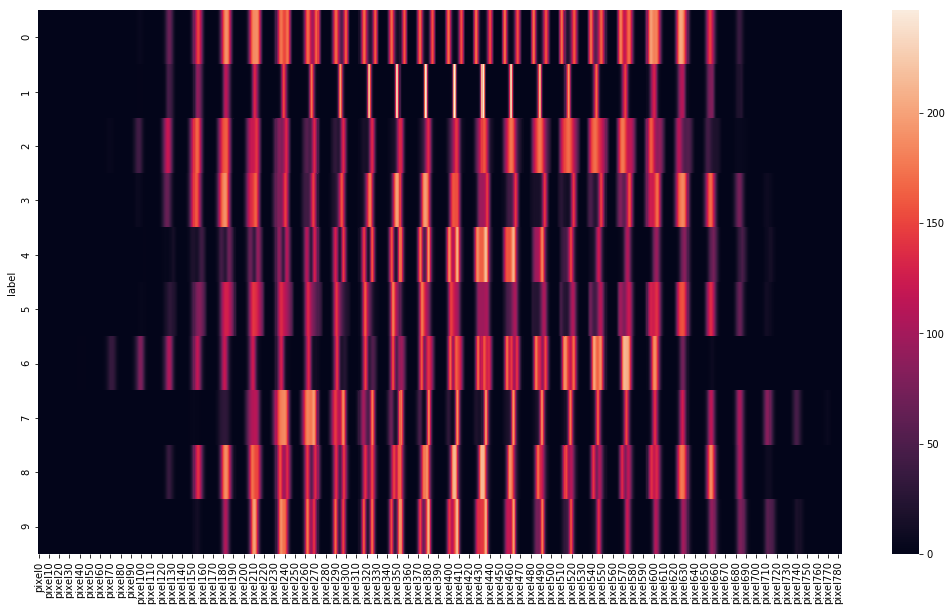

In [46]:
plt.figure(figsize=(18, 10))
sns.heatmap(digits_mean)

In [47]:
label = df_digits.label
df_digits= df_digits.drop('label',axis=1)
print("Data Shape: ",df_digits.shape)
print("Label Shape: ",label.shape)

Data Shape:  (42000, 784)
Label Shape:  (42000,)


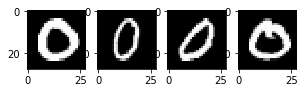

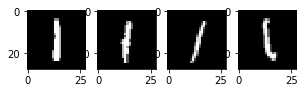

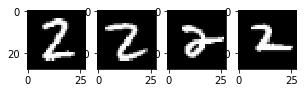

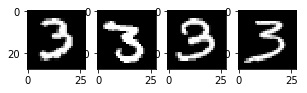

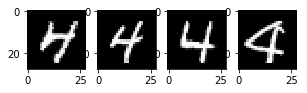

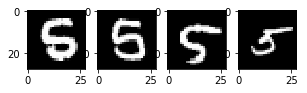

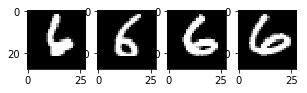

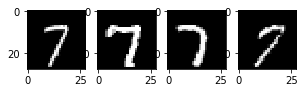

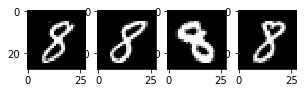

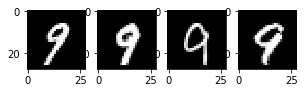

In [48]:
#Checking digits

for x in range(0,10):
    train_0=df_digits[label==x]
    digits_new=[]
    for idx in train_0.index:
        val=train_0.loc[idx].values.reshape(28,28)
        digits_new.append(val)
    plt.figure(figsize=(25,25))   
    for x in range(1,5):
        ax1=plt.subplot(1, 20, x)
        ax1.imshow(digits_new[x],cmap='gray')

<function matplotlib.pyplot.show(*args, **kw)>

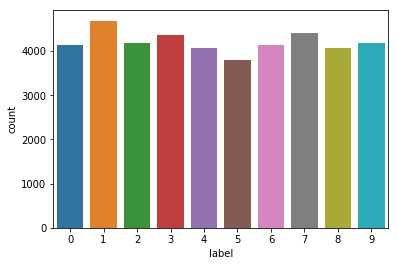

In [49]:
#plot count plot

sns.countplot(label)
plt.show

In [50]:
# Analysing Outliers

df_digits.describe(percentiles=[0.1,0.25,0.5,0.75,0.9,0.99])

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
10%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
90%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
99%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0


There are no outliers so we can go for model building

## Data Preparation for Model Building

In [51]:
# scaling the features

from sklearn.preprocessing import scale
X = scale(df_digits)

In [52]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, label, test_size = 0.8, random_state = 40)

## Model Building

First we will create linear SVM


### Linear SVM

In [53]:
# linear model

model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [54]:
# predict

y_pred = model_linear.predict(X_test)

In [55]:
# confusion matrix and accuracy

# accuracy

print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# confusion matrix

print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9132440476190476 

[[3183    0    6    4   13   34   23    3    7    2]
 [   1 3679    7   19    3    2    4   11   31    4]
 [  28   55 3036   85   55   10   22   25   31   10]
 [  20   21   79 3133   12  127    6   18   65   28]
 [   7   20   32    5 3049    6   18   12    9  107]
 [  49   32   28  124   38 2646   36    5   59   17]
 [  54    6   51    1   34   44 3132    0    3    0]
 [   5   26   47   37   69   12    2 3175    8  145]
 [  16   45   81  118   24  116   29   20 2724   41]
 [  23   11   15   36  151   27    1  126   16 2928]]


In [56]:
#Class-wise Accuracy

print(classification_report(y_true=y_test, y_pred=y_pred ))

             precision    recall  f1-score   support

          0       0.94      0.97      0.96      3275
          1       0.94      0.98      0.96      3761
          2       0.90      0.90      0.90      3357
          3       0.88      0.89      0.89      3509
          4       0.88      0.93      0.91      3265
          5       0.88      0.87      0.87      3034
          6       0.96      0.94      0.95      3325
          7       0.94      0.90      0.92      3526
          8       0.92      0.85      0.88      3214
          9       0.89      0.88      0.89      3334

avg / total       0.91      0.91      0.91     33600



The linear model gives approx. 91% accuracy. Let's look at a sufficiently non-linear model with randomly chosen hyperparameters.

### Non-Linear SVM

In [57]:
# non-linear model
# using rbf kernel, C=1, default value of gamma
# model

non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [58]:
# confusion matrix and accuracy
# accuracy

print("accuracy:", metrics.accuracy_score(y_true=y_test, y_pred=y_pred), "\n")

# confusion matrix

print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

accuracy: 0.9379761904761905 

[[3181    0   15    3    6   10   30   11   18    1]
 [   0 3693   12    7    5    4    5   14   17    4]
 [  10   14 3151   25   21    2   17   72   37    8]
 [   7   18   71 3172    5   82    6   82   51   15]
 [   4   10   39    1 3080   10   11   24    8   78]
 [  19   11   18   57   15 2794   68   28   16    8]
 [  22    5   23    1   14   31 3189   32    8    0]
 [   3   25   39   16   21    1    2 3319    5   95]
 [  15   25   33   54   17   78   13   28 2922   29]
 [  15    9   21   49   73    7    1  118   26 3015]]


In [59]:
#Class-wise Accuracy

print(classification_report(y_true=y_test, y_pred=y_pred ))

             precision    recall  f1-score   support

          0       0.97      0.97      0.97      3275
          1       0.97      0.98      0.98      3761
          2       0.92      0.94      0.93      3357
          3       0.94      0.90      0.92      3509
          4       0.95      0.94      0.94      3265
          5       0.93      0.92      0.92      3034
          6       0.95      0.96      0.96      3325
          7       0.89      0.94      0.92      3526
          8       0.94      0.91      0.92      3214
          9       0.93      0.90      0.92      3334

avg / total       0.94      0.94      0.94     33600




As we can see that the value of precision, recall and f1-score is good and maintaining a value approx 90%+. 
Hence we can say that the class-wise accuracy will also be in this range.

The non-linear model gives approx. 94% accuracy. 
Let's choose hyperparameters corresponding to non-linear models.

### Grid Search Cross-Validation

Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. We'll use 5-fold cross validation

In [60]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 101)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-3, 1e-4, 1e-5],
                     'C': [ 0.01, 0.1, 1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        n_jobs=-1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)    

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 37.3min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 51.7min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'gamma': [0.001, 0.0001, 1e-05], 'C': [0.01, 0.1, 1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [61]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,164.449582,3.861954,19.193306,0.060876,0.01,0.001,"{'C': 0.01, 'gamma': 0.001}",0.536905,0.527976,0.493452,...,0.524524,0.016770,15,0.561607,0.539435,0.507738,0.541220,0.535863,0.537173,0.017243
1,162.254294,0.375145,19.265934,0.046914,0.01,0.0001,"{'C': 0.01, 'gamma': 0.0001}",0.102976,0.123810,0.112500,...,0.109881,0.008473,17,0.111607,0.106399,0.109226,0.109673,0.112500,0.109881,0.002118
2,161.396723,0.966091,19.189280,0.084469,0.01,1e-05,"{'C': 0.01, 'gamma': 1e-05}",0.102976,0.123810,0.112500,...,0.109881,0.008473,17,0.111607,0.106399,0.109226,0.109673,0.112500,0.109881,0.002118
3,71.482442,0.888969,14.836938,0.106814,0.1,0.001,"{'C': 0.1, 'gamma': 0.001}",0.865476,0.862500,0.873810,...,0.874167,0.009424,12,0.891369,0.893601,0.891369,0.894048,0.895387,0.893155,0.001572
4,125.224883,1.158683,18.031235,0.459395,0.1,0.0001,"{'C': 0.1, 'gamma': 0.0001}",0.709524,0.732143,0.733333,...,0.728452,0.009791,14,0.733631,0.742113,0.742411,0.728720,0.731101,0.735595,0.005661
5,163.545236,3.454845,19.757382,0.878772,0.1,1e-05,"{'C': 0.1, 'gamma': 1e-05}",0.102976,0.123810,0.113095,...,0.110119,0.008527,16,0.111607,0.106399,0.110268,0.110268,0.112500,0.110208,0.002085
6,36.722451,0.481369,10.286500,1.157611,1,0.001,"{'C': 1, 'gamma': 0.001}",0.933333,0.927976,0.929762,...,0.932857,0.004508,4,0.974554,0.975744,0.975149,0.973810,0.973363,0.974524,0.000865
7,55.222559,2.908879,13.624528,0.810133,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.899405,0.889881,0.901190,...,0.902143,0.008623,11,0.918601,0.920536,0.916220,0.918006,0.916220,0.917917,0.001618
8,146.823835,10.709336,21.120781,3.186537,1,1e-05,"{'C': 1, 'gamma': 1e-05}",0.729167,0.748810,0.745238,...,0.743571,0.007410,13,0.752232,0.756696,0.757143,0.744048,0.743452,0.750714,0.005943
9,32.046198,3.564896,8.577565,0.175013,10,0.001,"{'C': 10, 'gamma': 0.001}",0.937500,0.940476,0.936905,...,0.941667,0.004626,1,0.998958,0.999554,0.999554,0.999107,0.999107,0.999256,0.000249


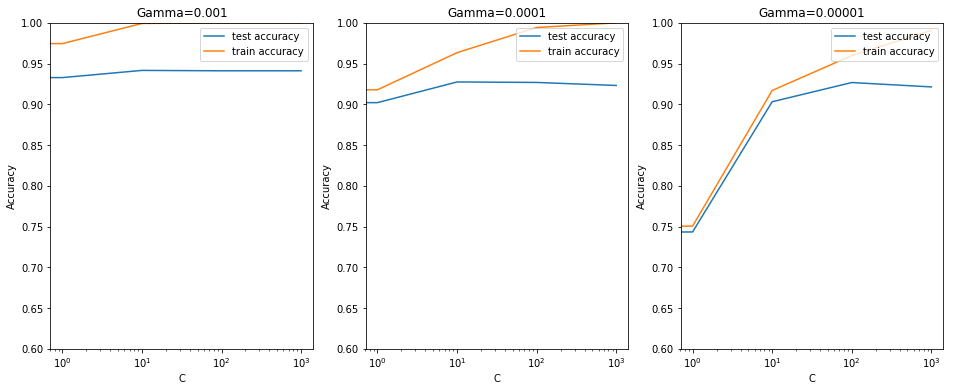

In [62]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper right')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper right')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.00001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.00001")
plt.ylim([0.60, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper right')
plt.xscale('log')


This plot reveals some interesting insights:

This plot reveals some interesting insights:

Non linear model gives better accuracy than linear.

At any value of gamma, high value of C gives better performance.

High values of gamma lead to overfitting (especially at high values of C); note that the training accuracy at gamma=0.001 and C=1000 reaches grater than 99% 

The test score is high and comparable (at sufficiently high cost, i.e. C > 10)

The least amount of overfitting (i.e. difference between train and test accuracy) occurs at lower gamma= 0.00001 i.e. a quite simple non-linear model : Not great accuracy values.

This suggests that the problem and the data is **inherently non-linear** in nature, and a complex model will outperform simple, linear models in this case.


In [63]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9416666666666667 corresponding to hyperparameters {'C': 10, 'gamma': 0.001}


####  Optimal Hyperparameters chosen for rebuilding the model are :  C =10     &     gamma = 0.001

## Final model

In [64]:
# model with optimal hyperparameters

# model
model = SVC(C=10, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# metrics
print(metrics.confusion_matrix(y_test, y_pred), "\n")
print("accuracy", metrics.accuracy_score(y_test, y_pred))

[[3202    0   14    1    6    7   24   10   11    0]
 [   0 3691    8   12    3    3    6   19   12    7]
 [   8   15 3178   34   20    1   19   58   14   10]
 [   6    8   57 3237    7   71    4   59   37   23]
 [   6   12   30    3 3101    3   13   21    4   72]
 [  19   12   14   49   19 2833   38   22   20    8]
 [  22    4   21    1   11   21 3216   26    3    0]
 [   2   21   42   22   28    5    0 3328    3   75]
 [  15   16   35   50   17   54   12   25 2968   22]
 [  10    8   22   32   68   15    1   97   11 3070]] 

accuracy 0.9471428571428572


## Conclusion

The accuracy achieved using a non-linear kernel is (~0.95)and for  a linear one (~0.91). so we can  conclude that the problem is highly non-linear in nature.
